In [253]:
import pandas as pd #Biblioteca pandas
import matplotlib.pyplot as plt #Biblioteca matplotlib para fazer os gráficos

In [254]:
#Leitura sos arquivos de dados
cagedMov = pd.read_csv(r'CAGEDMOV202001.txt', delimiter=';', encoding="UTF-8", usecols=['competência','município','seção','graudeinstrução','saldomovimentação','idade','raçacor','sexo','tipomovimentação','salário'])
cagedEst = pd.read_csv(r'CAGEDESTAB202001.txt', delimiter=';', encoding="UTF-8", usecols=['competência','município','admitidos','desligados','saldomovimentação'])

In [256]:
#Imprimindo os valores da base de Movimentação
cagedMov

,competência,município,seção,saldomovimentação,graudeinstrução,idade,sexo,tipomovimentação,salário,raçacor
0,202001,420550,H,1,5,42,1,20,2582.439941,1
1,202001,355030,N,-1,4,56,3,40,633.599976,3
2,202001,411990,N,1,7,24,1,20,6.770000,1
3,202001,355030,Q,-1,7,32,3,40,2448.000000,1
4,202001,355030,A,-1,7,33,1,31,1538.930054,3
...,...,...,...,...,...,...,...,...,...,...
2617697,202001,355030,Q,1,9,25,1,10,15675.629883,1
2617698,202001,353980,S,1,6,15,1,10,788.000000,1
2617699,202001,431490,F,1,5,28,1,20,1250.000000,2
2617700,202001,330250,H,1,5,38,1,20,1609.000000,1


In [257]:
#Imprimindo os valores da base de Estabelecimeto
cagedEst

,competência,município,admitidos,desligados,saldomovimentação
0,202001,351110,0,1,-1
1,202001,500660,0,1,-1
2,202001,330390,0,1,-1
3,202001,500110,0,1,-1
4,202001,330070,0,1,-1
...,...,...,...,...,...
833732,202001,315550,0,1,-1
833733,202001,500460,2,0,2
833734,202001,310740,1,1,0
833735,202001,315550,0,1,-1


In [258]:
admitidosSoma = cagedEst['admitidos'].sum() #Quantidade total de admitidos no mês de janeiro
admitidosSoma

1504004

In [259]:
desligadosSoma = cagedEst['desligados'].sum() #Quantidade total de demitidos no mês de janeiro
desligadosSoma

1386759

In [578]:
TotalMovimentação = admitidosSoma + desligadosSoma
TotalMovimentação

2890763

In [260]:
cagedEst['saldomovimentação'].sum() # Saldo moviementação (ou seja houveram mais pessoas admitidas do que desligadas)

117245

In [261]:
1504004 - 1386759 #Verificando a vericidade do saldo de movimentação

117245

In [262]:
1504004 + 1386759 #Verificando a vericidade do total de registros na base de Movimentação (2617701)

2890763

In [545]:
cagedMov.groupby('sexo')['sexo'].sum() #Tipo de de genero na base

sexo
1    1571955
3    3137241
Name: sexo, dtype: int64

In [264]:
homensAdmitidoSoma = cagedMov.query('sexo == 1 and  saldomovimentação == 1')['sexo'].count()
homensAdmitidoSoma #Quantidade de homens que foram admitidos

816213

In [265]:
homensDesligadoSoma = cagedMov.query('sexo == 1 and  saldomovimentação == -1')['sexo'].count()
homensDesligadoSoma #Quantidade de homens que foram desligados

755742

In [266]:
mulheresAdmitidaSoma = int(cagedMov.query('sexo == 3 and  saldomovimentação == 1')['sexo'].count())
mulheresAdmitidaSoma #Quantidade de mulheres que foram admitidos

526049

In [267]:
MulheresDesligadaSoma = int(cagedMov.query('sexo == 3 and  saldomovimentação == -1')['sexo'].count())
MulheresDesligadaSoma #Quantidade de mulheres que foram desligadas

519698

In [268]:
NaoIdenAdmitidoSoma = cagedMov.query('sexo == 9 and  saldomovimentação == 1')['sexo'].count() 
NaoIdenAdmitidoSoma #Quantidade de pessoas "Não Identificada" que foram desligadas

0

In [269]:
NaoIdenDesligadoSoma = cagedMov.query('sexo == 9 and  saldomovimentação == -1')['sexo'].count() 
NaoIdenDesligadoSoma #Quantidade de pessoas "Não Identificada" que foram desligadas

0

In [270]:
#Soma total de toda movimentação seja adminitida ou demitida
(homensAdmitidoSoma + mulheresAdmitidaSoma) + (homensDesligadoSoma + MulheresDesligadaSoma)

2617702

In [346]:
#Total de adminitidos na base
TotalAdmitidos = homensAdmitidoSoma + mulheresAdmitidaSoma
TotalAdmitidos

1342262

In [546]:
#Total de demitidos na base
TotalDesligados = homensDesligadoSoma + MulheresDesligadaSoma
TotalDesligados

1275440

In [273]:
#Vericidade da soma com o total de linhas na base
2617702 == (816213 + 755742) + (526049 + 519698) 

True

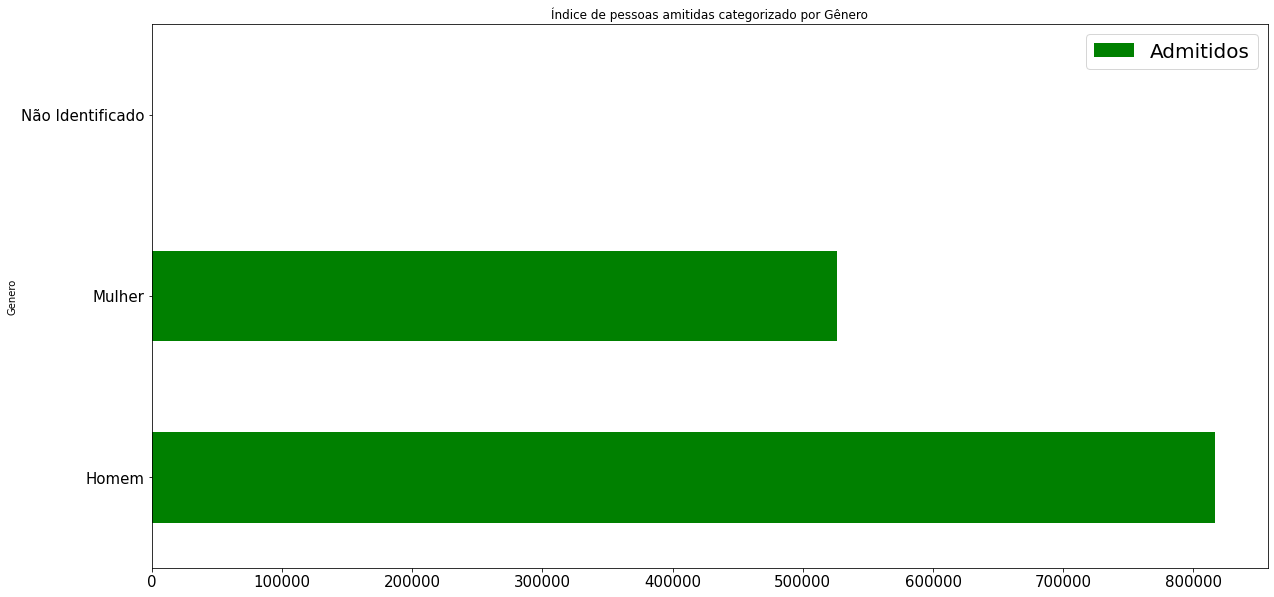

In [554]:
graf = pd.DataFrame({'Genero': ['Homem','Mulher','Não Identificado'],
                     'Admitidos': [homensAdmitidoSoma, mulheresAdmitidaSoma, NaoIdenAdmitidoSoma]})
ax = graf.plot.barh(x='Genero', y='Admitidos', rot=0, figsize=(20,10), fontsize=15, title = 'Índice de pessoas amitidas categorizado por Gênero', color='green').legend(loc= 'upper right', prop = {'size':20})

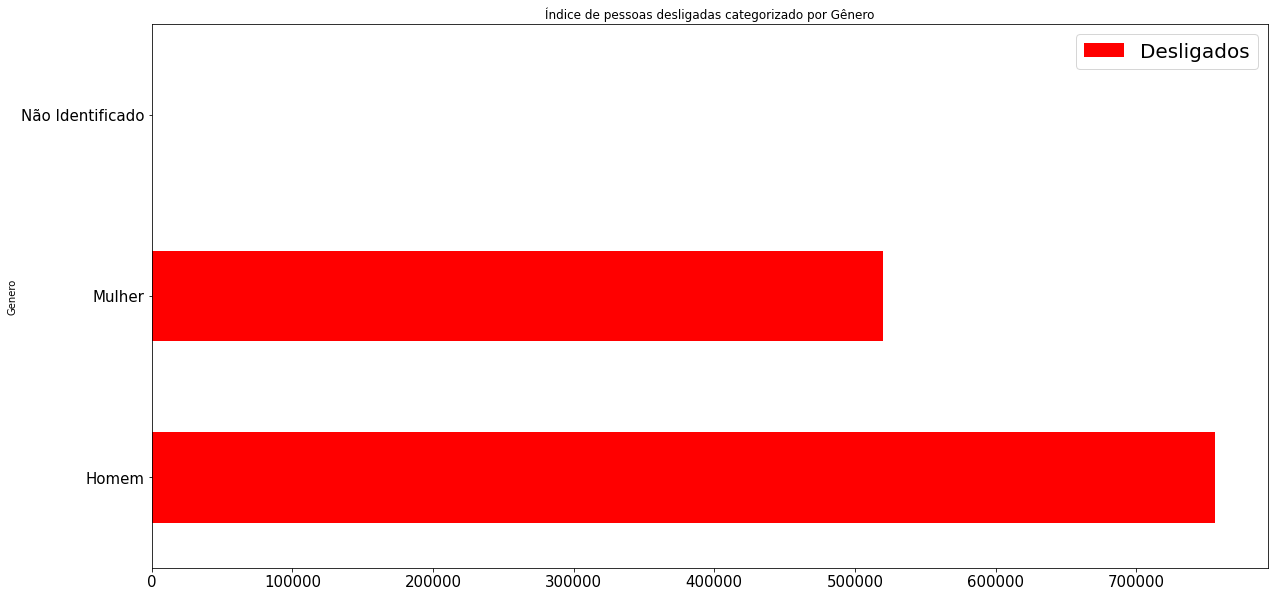

In [552]:
graf = pd.DataFrame({'Genero': ['Homem','Mulher','Não Identificado'],
                     'Desligados': [homensDesligadoSoma, MulheresDesligadaSoma, NaoIdenDesligadoSoma]})
ax = graf.plot.barh(x='Genero', y='Desligados', rot=0, figsize=(20,10), fontsize=15, title = 'Índice de pessoas desligadas categorizado por Gênero', color='red').legend(loc= 'upper right', prop = {'size':20})

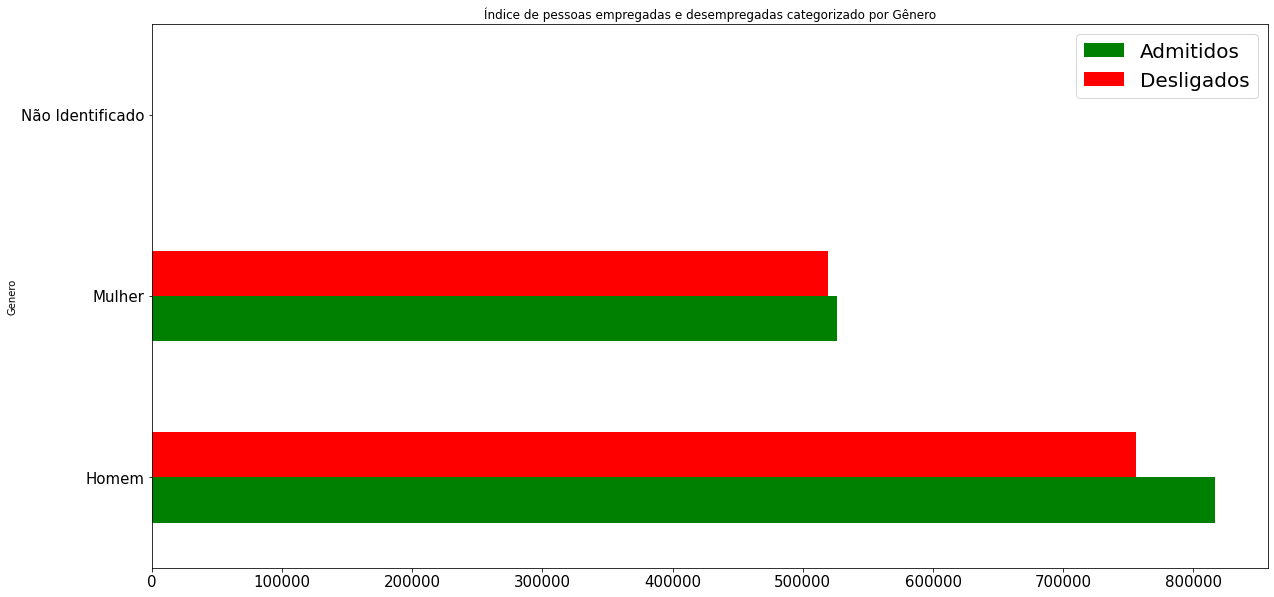

In [555]:
#índice de pessoas empregadas e desempregadas em certo período, categorizadas por Gênero
graf = pd.DataFrame({'Genero': ['Homem','Mulher','Não Identificado'],
                     'Admitidos': [homensAdmitidoSoma, mulheresAdmitidaSoma, NaoIdenAdmitidoSoma],
                     'Desligados':[homensDesligadoSoma, MulheresDesligadaSoma, NaoIdenDesligadoSoma]})
ax = graf.plot.barh(x='Genero', y=['Admitidos','Desligados'], rot=0, figsize=(20,10), fontsize=15, title = 'Índice de pessoas empregadas e desempregadas categorizado por Gênero',color={"Admitidos": "green", "Desligados": "red"}).legend(loc= 'upper right', prop = {'size':20})

In [277]:
#Admitidos sendo categorizados por classe Social
admitidosClasseE = cagedMov.query('salário <= 2090 and  saldomovimentação == 1')['salário'].count()
admitidosClasseD = cagedMov.query('salário > 2090 and salário <= 4180 and saldomovimentação == 1')['salário'].count()
admitidosClasseC = cagedMov.query('salário > 4180 and salário <= 10450 and saldomovimentação == 1')['salário'].count()
admitidosClasseB = cagedMov.query('salário > 10450 and salário <= 20900 and saldomovimentação == 1')['salário'].count()
admitidosClasseA = cagedMov.query('salário > 20900 and saldomovimentação == 1')['salário'].count()

#Desligados sendo categorizados por classe Social
desligadoClasseE = cagedMov.query('salário <= 2090 and  saldomovimentação == -1')['salário'].count()
desligadoClasseD = cagedMov.query('salário > 2090 and salário <= 4180 and saldomovimentação == -1')['salário'].count()
desligadoClasseC = cagedMov.query('salário > 4180 and salário <= 10450 and saldomovimentação == -1')['salário'].count()
desligadoClasseB = cagedMov.query('salário > 10450 and salário <= 20900 and saldomovimentação == -1')['salário'].count()
desligadoClasseA = cagedMov.query('salário > 20900 and saldomovimentação == -1')['salário'].count()

In [574]:
#Se repararmos na quantidade de linhas retornada por cada coluna, perceberemos que as coluna [salário] e [raçacor] estão
# com uma quantidade inferior comparada as demais. Isso nos mostra que alguns campos estão vazios e consequentemente algumas
# informações darão divergência
cagedMov.count()

competência          2617702
município            2617702
seção                2617702
saldomovimentação    2617702
graudeinstrução      2617702
idade                2617702
sexo                 2617702
tipomovimentação     2617702
salário              2603308
raçacor              2617702
dtype: int64

In [559]:
#Soma todal dos admitidos por classe social
1342262 == admitidosClasseA + admitidosClasseB + admitidosClasseC + admitidosClasseD + admitidosClasseE 

True

In [560]:
#Analisando os dados presente na base podemos perceber que alguns campos de salários se encnotram sem valores
#O que de fato ocorre uma divergência na soma total no entanto isso não impacta em nossa analise
1275440 == desligadoClasseA + desligadoClasseB + desligadoClasseC + desligadoClasseD + desligadoClasseE 

False

In [280]:
#Admitidos por classe
print(admitidosClasseA , admitidosClasseB , admitidosClasseC , admitidosClasseD , admitidosClasseE)

5853 6771 35959 122797 1170882


In [281]:
#Desligados por classe
print(desligadoClasseA, desligadoClasseB, desligadoClasseC, desligadoClasseD, desligadoClasseE)

5753 6694 36163 122285 1090151


In [282]:
print(homensDesligadoSoma, MulheresDesligadaSoma)

755742 519698


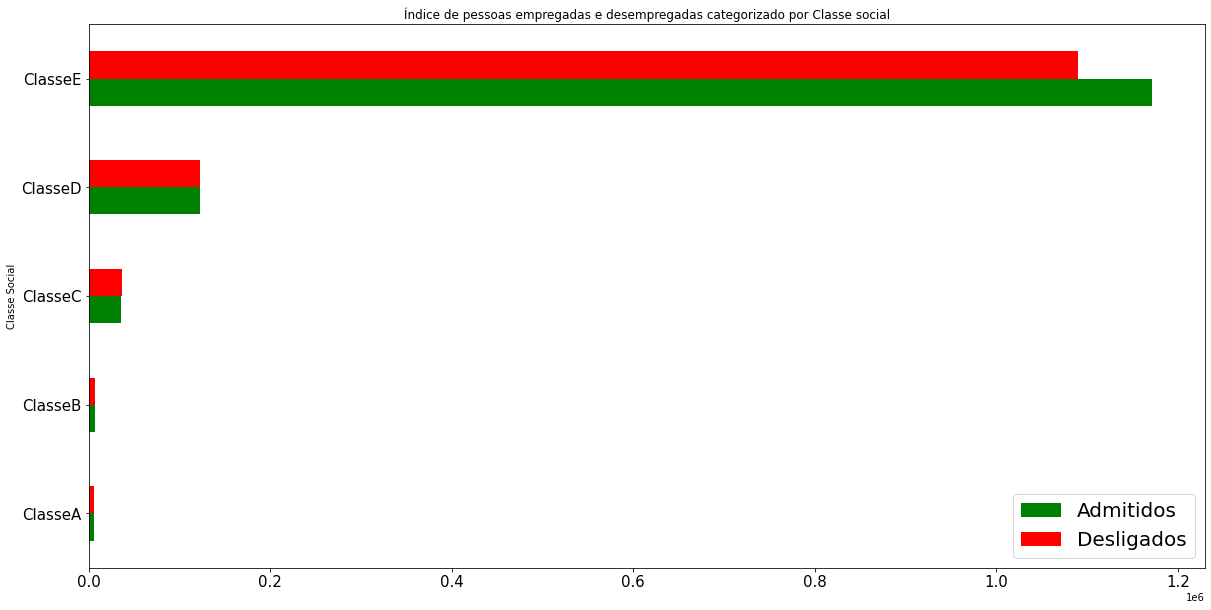

In [592]:
#índice de pessoas empregadas e desempregadas em certo período, categorizadas por Classe social 
graf = pd.DataFrame({'Classe Social': ['ClasseA','ClasseB','ClasseC','ClasseD','ClasseE'],
                     'Admitidos': [admitidosClasseA, admitidosClasseB, admitidosClasseC, admitidosClasseD, admitidosClasseE],
                     'Desligados':[desligadoClasseA, desligadoClasseB, desligadoClasseC, desligadoClasseD, desligadoClasseE]})
ax = graf.plot.barh(x='Classe Social', y=['Admitidos','Desligados'], rot=0, figsize=(20,10), fontsize=15, title = 'Índice de pessoas empregadas e desempregadas categorizado por Classe social',color={"Admitidos": "green", "Desligados": "red"}).legend(loc= 'lower right', prop = {'size':20})

In [593]:
#Agrupamos os dados por idade
Idades = cagedMov.groupby('idade')['idade'].count()
Idades

idade
10        1
11        3
12        3
13       53
14     2786
       ... 
91        3
93        2
94        1
99        3
100       1
Name: idade, Length: 86, dtype: int64

In [290]:
#Tendo em vista a quantidade de variações, agrupamos a quantidade de idade por faixa etaria

#Agrupamento de adminitidos por faixa etaria
admitidoGrupoA = cagedMov.query('idade <= 21 and saldomovimentação == 1')['idade'].count() #0-21
admitidoGrupoB = cagedMov.query('idade > 21 and idade <= 40 and saldomovimentação == 1')['idade'].count()  #22-40
admitidoGrupoC = cagedMov.query('idade > 40 and idade <= 60 and saldomovimentação == 1')['idade'].count()  #41-60
admitidoGrupoD = cagedMov.query('idade > 60 and saldomovimentação == 1')['idade'].count()  # 61 - infinito

#Agrupamento de desligados por faixa etaria
desligadoGrupoA = cagedMov.query('idade <= 21 and saldomovimentação == -1')['idade'].count() #0-21
desligadoGrupoB = cagedMov.query('idade > 21 and idade <= 40 and saldomovimentação == -1')['idade'].count()  #22-40
desligadoGrupoC = cagedMov.query('idade > 40 and idade <= 60 and saldomovimentação == -1')['idade'].count()  #41-60
desligadoGrupoD = cagedMov.query('idade > 60 and saldomovimentação == -1')['idade'].count()  # 61 - infinito

In [598]:
#Quantidade total de admitidos
1342262 == admitidoGrupoA + admitidoGrupoB + admitidoGrupoC + admitidoGrupoD 

True

In [599]:
#Quantidade total de desligamentos
1275440 == desligadoGrupoA + desligadoGrupoB + desligadoGrupoC + desligadoGrupoD

True

In [293]:
#Quantidade de admitidos por faixa etária
print (admitidoGrupoA , admitidoGrupoB , admitidoGrupoC , admitidoGrupoD )

255773 813827 261357 11305


In [294]:
#Quantidade de desligados por faixa etária
print(desligadoGrupoA , desligadoGrupoB , desligadoGrupoC , desligadoGrupoD)

188514 796755 269399 20772


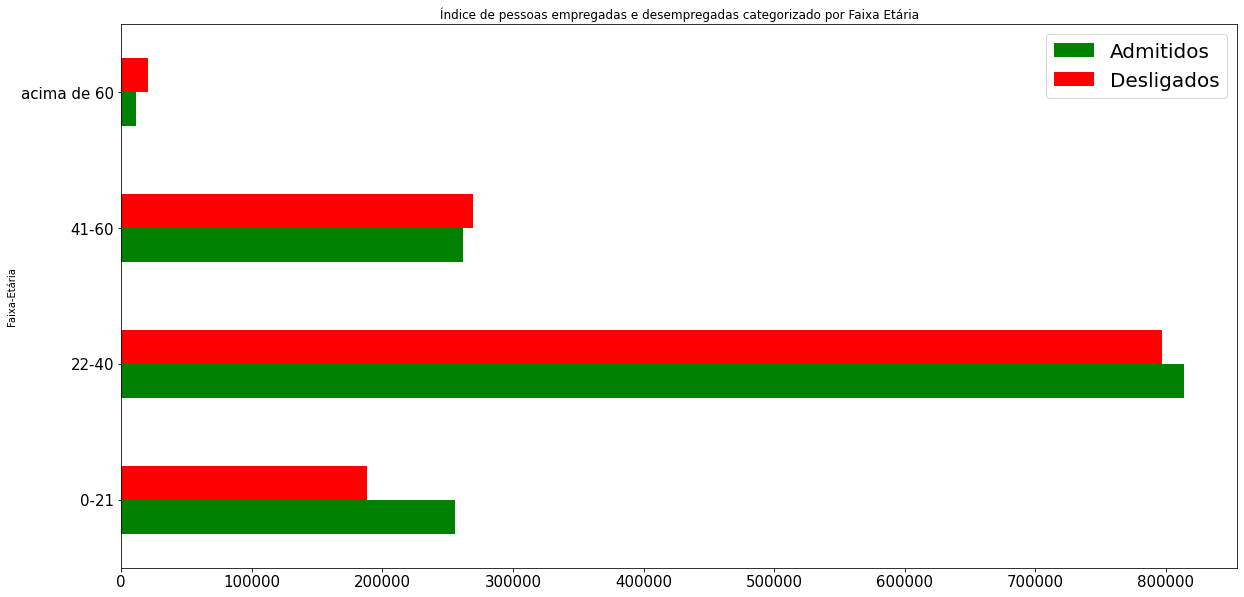

In [603]:
#índice de pessoas empregadas e desempregadas em certo período, categorizadas por Faixa Etária 
graf = pd.DataFrame({'Faixa-Etária': ['0-21','22-40','41-60','acima de 60'],
                     'Admitidos': [admitidoGrupoA, admitidoGrupoB, admitidoGrupoC, admitidoGrupoD],
                     'Desligados':[desligadoGrupoA, desligadoGrupoB, desligadoGrupoC, desligadoGrupoD]})
ax = graf.plot.barh(x='Faixa-Etária', y=['Admitidos','Desligados'], rot=0, figsize=(20,10), fontsize=15, title = 'Índice de pessoas empregadas e desempregadas categorizado por Faixa Etária',color={"Admitidos": "green", "Desligados": "red"}).legend(loc= 'upper right', prop = {'size':20})

In [604]:
#Agrupamos os dados por escolaridades
cagedMov.groupby('graudeinstrução')['graudeinstrução'].count()

graudeinstrução
1       10349
2       61690
3       48294
4      132300
5      212603
6      208438
7     1545800
8      114593
9      255419
10       4860
11       1853
12          1
13         15
80      21487
Name: graudeinstrução, dtype: int64

In [298]:
# Se verificarmos o Layout da Base perceberemos que o cdigo 12 e 13 não constam, 
# totalizando 16 desligados a menos em relação a movimentação total de individuos

# Admitidos por Escolaridade
EscGrupo1 = cagedMov.query('graudeinstrução == 1 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo2 = cagedMov.query('graudeinstrução == 2 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo3 = cagedMov.query('graudeinstrução == 3 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo4 = cagedMov.query('graudeinstrução == 4 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo5 = cagedMov.query('graudeinstrução == 5 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo6 = cagedMov.query('graudeinstrução == 6 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo7 = cagedMov.query('graudeinstrução == 7 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo8 = cagedMov.query('graudeinstrução == 8 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo9 = cagedMov.query('graudeinstrução == 9 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo10 = cagedMov.query('graudeinstrução == 10 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo11 = cagedMov.query('graudeinstrução == 11 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo80 = cagedMov.query('graudeinstrução == 80 and saldomovimentação == 1')['graudeinstrução'].count()
EscGrupo99 = cagedMov.query('graudeinstrução == 99 and saldomovimentação == 1')['graudeinstrução'].count()

# Demitidos por Escolaridade
DesEscGrupo1 = cagedMov.query('graudeinstrução == 1 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo2 = cagedMov.query('graudeinstrução == 2 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo3 = cagedMov.query('graudeinstrução == 3 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo4 = cagedMov.query('graudeinstrução == 4 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo5 = cagedMov.query('graudeinstrução == 5 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo6 = cagedMov.query('graudeinstrução == 6 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo7 = cagedMov.query('graudeinstrução == 7 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo8 = cagedMov.query('graudeinstrução == 8 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo9 = cagedMov.query('graudeinstrução == 9 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo10 = cagedMov.query('graudeinstrução == 10 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo11 = cagedMov.query('graudeinstrução == 11 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo80 = cagedMov.query('graudeinstrução == 80 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo99 = cagedMov.query('graudeinstrução == 99 and saldomovimentação == -1')['graudeinstrução'].count()

In [299]:
# Admitidos por Grupo de Escolaridade
print (EscGrupo1, EscGrupo2, EscGrupo3, EscGrupo4, EscGrupo5, EscGrupo6, EscGrupo7, 
       EscGrupo8, EscGrupo9, EscGrupo10, EscGrupo11, EscGrupo80, EscGrupo99)

5132 30972 24653 70194 109259 108103 787069 58756 133493 2453 850 11328 0


In [300]:
# Soma total dos admitidos
1342262 == EscGrupo1 + EscGrupo2 + EscGrupo3 + EscGrupo4 + EscGrupo5 + EscGrupo6 + EscGrupo7 + EscGrupo8 + EscGrupo9 + EscGrupo10 + EscGrupo11 + EscGrupo80 + EscGrupo99

True

In [605]:
# Desligados por Grupo Escolaridade
print (DesEscGrupo1, DesEscGrupo2, DesEscGrupo3, DesEscGrupo4, DesEscGrupo5, DesEscGrupo6, DesEscGrupo7, 
       DesEscGrupo8, DesEscGrupo9, DesEscGrupo10, DesEscGrupo11, DesEscGrupo80, DesEscGrupo99)

249782 30718 23641 62106 103344 100335 758731 55837 121926 2407 1003 10159 0


In [606]:
#A seguinte diferença no dados é devido os valores fora do layout informado
# Soma total dos desligados
1275440 == DesEscGrupo1 + DesEscGrupo2 + DesEscGrupo3 + DesEscGrupo4 + DesEscGrupo5 + DesEscGrupo6 + DesEscGrupo7 + DesEscGrupo8 + DesEscGrupo9 + DesEscGrupo10 + DesEscGrupo11 +DesEscGrupo80 + DesEscGrupo99

False

In [607]:
# Diferença entre o total de Desligados e o total de Desligados associados ao nível de escolaridade
5217+ 30718 +23641 +62106 +103344 +100335 +758731 +55837 +121926 +2407 +1003 +10159 +0
print (1275440-1275424)

16


In [608]:
#Valor total de pessoas || Total de admitidos || Total de desligados
print(2617702,1342262,1275440)
print (1342262+1275440==2617702)

2617702 1342262 1275440
True


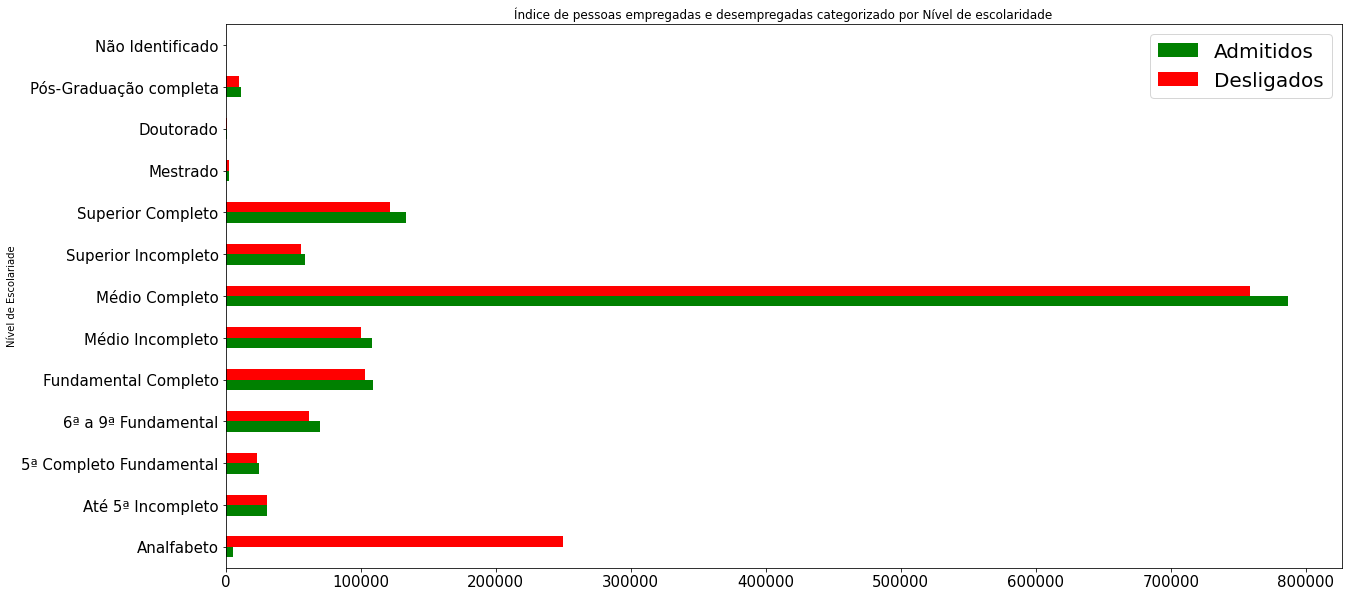

In [609]:
#índice de pessoas empregadas e desempregadas categorizadas por Nível de escolaridade
graf = pd.DataFrame({'Nível de Escolariade': ['Analfabeto',
                                              'Até 5ª Incompleto',
                                              '5ª Completo Fundamental',
                                              '6ª a 9ª Fundamental',
                                              'Fundamental Completo',
                                              'Médio Incompleto',
                                              'Médio Completo',
                                              'Superior Incompleto',
                                              'Superior Completo',
                                              'Mestrado',
                                              'Doutorado',
                                              'Pós-Graduação completa',
                                              'Não Identificado'],
                     'Admitidos': [EscGrupo1, EscGrupo2, EscGrupo3, EscGrupo4, EscGrupo5, EscGrupo6, EscGrupo7, 
                                   EscGrupo8, EscGrupo9, EscGrupo10, EscGrupo11, EscGrupo80, EscGrupo99],
                     'Desligados':[DesEscGrupo1, DesEscGrupo2, DesEscGrupo3, DesEscGrupo4, DesEscGrupo5, DesEscGrupo6, DesEscGrupo7, 
                                   DesEscGrupo8, DesEscGrupo9, DesEscGrupo10, DesEscGrupo11, DesEscGrupo80, DesEscGrupo99]})
ax = graf.plot.barh(x='Nível de Escolariade', y=['Admitidos','Desligados'],rot=0, figsize=(20,10), fontsize=15, title ='Índice de pessoas empregadas e desempregadas categorizado por Nível de escolaridade',color={"Admitidos": "green", "Desligados": "red"}).legend(loc= 'upper right', prop = {'size':20})

In [610]:
#Agrupamos todos valores para conferir os dados que temos na base
DemiçãoMotivo = cagedMov.groupby('tipomovimentação')['tipomovimentação'].count()
DemiçãoMotivo

tipomovimentação
10     104531
20    1230582
25       6425
31     660201
32      19813
33       1242
35        724
40     335442
43     191289
45      30464
50       1508
60       4115
90      16927
98         45
99      14394
Name: tipomovimentação, dtype: int64

In [311]:
#Soma de todos os valores agrupados
660201 + 19813 + 1242 + 335442 + 191289 + 30464 + 1508 + 4115 + 16927 + 45 + 99 + 14394

1275539

In [383]:
#Soma total de desligado no mês
cagedMov.query('saldomovimentação == -1')['saldomovimentação'].count()
#Comparando os valores do das categorias com relação a demissão e o total de demissão os valores não estão iguais
#Com base nessa informação podemos concluir que existem admissões com tipo de movimentação informado de forma errada ou nulos

1275440

In [344]:
# Demição sem justa causa classificada pelo genero masculino
DesEscGrupo1 = cagedMov.query('tipomovimentação == 31 and sexo == 1 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo1

410419

In [345]:
# Demição sem justa causa classificada pelo genreo feminino
DesEscGrupo1 = cagedMov.query('tipomovimentação == 31 and sexo == 3 and saldomovimentação == -1')['graudeinstrução'].count()
DesEscGrupo1 #660201

249782

In [343]:
660201 == 410419 + 249782 #Vericidade das consultas pelo total de demitidos independete do genero

True

In [ ]:
# Demição classificado por grupo e por homem
DesTipHomGrupo1 = cagedMov.query('tipomovimentação == 31 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo2 = cagedMov.query('tipomovimentação == 32 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo3 = cagedMov.query('tipomovimentação == 33 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo4 = cagedMov.query('tipomovimentação == 40 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo5 = cagedMov.query('tipomovimentação == 43 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo6 = cagedMov.query('tipomovimentação == 45 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo7 = cagedMov.query('tipomovimentação == 50 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo8 = cagedMov.query('tipomovimentação == 60 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo9 = cagedMov.query('tipomovimentação == 80 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo10 = cagedMov.query('tipomovimentação == 90 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo11 = cagedMov.query('tipomovimentação == 98 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipHomGrupo12 = cagedMov.query('tipomovimentação == 99 and sexo == 1 and saldomovimentação == -1')['tipomovimentação'].count()

# Demição classificado por grupo e por mulher
DesTipMulGrupo1 = cagedMov.query('tipomovimentação == 31 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo2 = cagedMov.query('tipomovimentação == 32 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo3 = cagedMov.query('tipomovimentação == 33 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo4 = cagedMov.query('tipomovimentação == 40 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo5 = cagedMov.query('tipomovimentação == 43 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo6 = cagedMov.query('tipomovimentação == 45 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo7 = cagedMov.query('tipomovimentação == 50 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo8 = cagedMov.query('tipomovimentação == 60 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo9 = cagedMov.query('tipomovimentação == 80 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo10 = cagedMov.query('tipomovimentação == 90 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo11 = cagedMov.query('tipomovimentação == 98 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()
DesTipMulGrupo12 = cagedMov.query('tipomovimentação == 99 and sexo == 3 and saldomovimentação == -1')['tipomovimentação'].count()

In [614]:
#Exibindo os dados
print(DesTipHomGrupo1, DesTipHomGrupo2, DesTipHomGrupo3, DesTipHomGrupo4, DesTipHomGrupo5, DesTipHomGrupo6, DesTipHomGrupo7, DesTipHomGrupo8,
DesTipHomGrupo9, DesTipHomGrupo10, DesTipHomGrupo11, DesTipHomGrupo12)

print(DesTipMulGrupo1, DesTipMulGrupo2, DesTipMulGrupo3, DesTipMulGrupo4, DesTipMulGrupo5, DesTipMulGrupo6, DesTipMulGrupo7, DesTipMulGrupo8,
DesTipMulGrupo9, DesTipMulGrupo10, DesTipMulGrupo11, DesTipMulGrupo12)

410419 13352 830 183644 106326 17691 786 3085 0 10676 39 8894
249782 6461 412 151798 84963 12773 722 1030 0 6251 6 5500


In [615]:
#Temos uma margem de erro tendo em vista que há admissões com tipo de movimentação errados ou campo pode não informados (NULL)
SomaDesTipHomGrupo = DesTipHomGrupo1 + DesTipHomGrupo2 + DesTipHomGrupo3 + DesTipHomGrupo4 + DesTipHomGrupo5 + DesTipHomGrupo6 + DesTipHomGrupo7 + DesTipHomGrupo8 + DesTipHomGrupo9 + DesTipHomGrupo10 + DesTipHomGrupo11 + DesTipHomGrupo12
SomaDesTipMulGrupo = DesTipMulGrupo1 + DesTipMulGrupo2 + DesTipMulGrupo3 + DesTipMulGrupo4 + DesTipMulGrupo5 + DesTipMulGrupo6 + DesTipMulGrupo7 + DesTipMulGrupo8 + DesTipMulGrupo9 + DesTipMulGrupo10 + DesTipMulGrupo11 + DesTipMulGrupo12
Total = SomaDesTipHomGrupo + SomaDesTipMulGrupo
Total

1275440

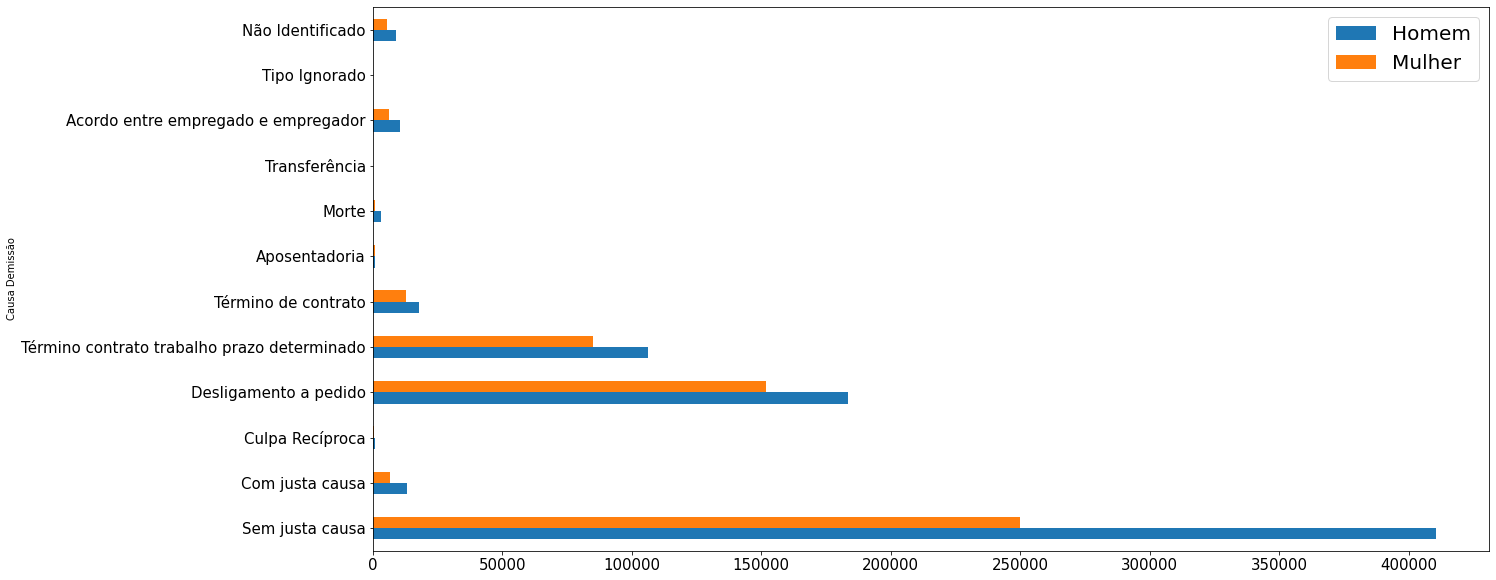

In [484]:
#Causas de demissão formalizadas pelos empregadores distribuídas por sexo
graf = pd.DataFrame({'Causa Demissão': ['Sem justa causa',
                                        'Com justa causa',
                                        'Culpa Recíproca',
                                        'Desligamento a pedido',
                                        'Término contrato trabalho prazo determinado',
                                        'Término de contrato',
                                        'Aposentadoria',
                                        'Morte',
                                        'Transferência',
                                        'Acordo entre empregado e empregador',
                                        'Tipo Ignorado',
                                        'Não Identificado'],
                     'Homem':[DesTipHomGrupo1, DesTipHomGrupo2, DesTipHomGrupo3, DesTipHomGrupo4, DesTipHomGrupo5, DesTipHomGrupo6, DesTipHomGrupo7, DesTipHomGrupo8, DesTipHomGrupo9, DesTipHomGrupo10, DesTipHomGrupo11, DesTipHomGrupo12],
                    'Mulher':[DesTipMulGrupo1, DesTipMulGrupo2, DesTipMulGrupo3, DesTipMulGrupo4, DesTipMulGrupo5, DesTipMulGrupo6, DesTipMulGrupo7, DesTipMulGrupo8, DesTipMulGrupo9, DesTipMulGrupo10, DesTipMulGrupo11, DesTipMulGrupo12]})
ax = graf.plot.barh(x='Causa Demissão', y=['Homem','Mulher'], rot=0, figsize=(20,10), fontsize=15).legend(loc= 'upper right', prop = {'size':20})

In [320]:
#Agrupamos todos valores para conferir os dados que temos na base
raçacor = cagedMov.query('saldomovimentação == -1').groupby('raçacor')['raçacor'].count()
raçacor

raçacor
1    536262
2     74174
3    439532
4      6246
5      1987
6    202845
9     14394
Name: raçacor, dtype: int64

In [324]:
#Homens que foram desligados da cor Branca
DesCorHomGrupo1 = cagedMov.query('raçacor == 1 and sexo == 1 and saldomovimentação == -1')['raçacor'].count()
DesCorHomGrupo1

297133

In [327]:
#Mulheres que foram desligados da cor Branca
DesCorMulGrupo1 = cagedMov.query('raçacor == 1 and sexo == 3 and saldomovimentação == -1')['raçacor'].count()
DesCorMulGrupo1

239129

In [620]:
#Conferindo a soma de homens e mulheres desligados da cor branca
536262 == DesCorHomGrupo1 + DesCorMulGrupo1

False

In [372]:
#Demição classificado 'Sem justa causa'
DesCor1Mov31 = cagedMov.query('raçacor == 1 and tipomovimentação == 31 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov31 = cagedMov.query('raçacor == 2 and tipomovimentação == 31 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov31 = cagedMov.query('raçacor == 3 and tipomovimentação == 31 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov31 = cagedMov.query('raçacor == 4 and tipomovimentação == 31 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov31 = cagedMov.query('raçacor == 5 and tipomovimentação == 31 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov31 = cagedMov.query('raçacor == 6 and tipomovimentação == 31 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov31 = cagedMov.query('raçacor == 9 and tipomovimentação == 31 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado 'Com justa causa'
DesCor1Mov32 = cagedMov.query('raçacor == 1 and tipomovimentação == 32 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov32 = cagedMov.query('raçacor == 2 and tipomovimentação == 32 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov32 = cagedMov.query('raçacor == 3 and tipomovimentação == 32 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov32 = cagedMov.query('raçacor == 4 and tipomovimentação == 32 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov32 = cagedMov.query('raçacor == 5 and tipomovimentação == 32 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov32 = cagedMov.query('raçacor == 6 and tipomovimentação == 32 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov32 = cagedMov.query('raçacor == 9 and tipomovimentação == 32 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado 'Culpa Recíproca'
DesCor1Mov33 = cagedMov.query('raçacor == 1 and tipomovimentação == 33 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov33 = cagedMov.query('raçacor == 2 and tipomovimentação == 33 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov33 = cagedMov.query('raçacor == 3 and tipomovimentação == 33 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov33 = cagedMov.query('raçacor == 4 and tipomovimentação == 33 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov33 = cagedMov.query('raçacor == 5 and tipomovimentação == 33 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov33 = cagedMov.query('raçacor == 6 and tipomovimentação == 33 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov33 = cagedMov.query('raçacor == 9 and tipomovimentação == 33 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por'Desligamento a pedido'
DesCor1Mov40 = cagedMov.query('raçacor == 1 and tipomovimentação == 40 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov40 = cagedMov.query('raçacor == 2 and tipomovimentação == 40 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov40 = cagedMov.query('raçacor == 3 and tipomovimentação == 40 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov40 = cagedMov.query('raçacor == 4 and tipomovimentação == 40 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov40 = cagedMov.query('raçacor == 5 and tipomovimentação == 40 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov40 = cagedMov.query('raçacor == 6 and tipomovimentação == 40 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov40 = cagedMov.query('raçacor == 9 and tipomovimentação == 40 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Término contrato trabalho prazo determinado'
DesCor1Mov43 = cagedMov.query('raçacor == 1 and tipomovimentação == 43 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov43 = cagedMov.query('raçacor == 2 and tipomovimentação == 43 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov43 = cagedMov.query('raçacor == 3 and tipomovimentação == 43 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov43 = cagedMov.query('raçacor == 4 and tipomovimentação == 43 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov43 = cagedMov.query('raçacor == 5 and tipomovimentação == 43 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov43 = cagedMov.query('raçacor == 6 and tipomovimentação == 43 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov43 = cagedMov.query('raçacor == 9 and tipomovimentação == 43 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Desligamento por Término de contrato'
DesCor1Mov45 = cagedMov.query('raçacor == 1 and tipomovimentação == 45 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov45 = cagedMov.query('raçacor == 2 and tipomovimentação == 45 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov45 = cagedMov.query('raçacor == 3 and tipomovimentação == 45 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov45 = cagedMov.query('raçacor == 4 and tipomovimentação == 45 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov45 = cagedMov.query('raçacor == 5 and tipomovimentação == 45 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov45 = cagedMov.query('raçacor == 6 and tipomovimentação == 45 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov45 = cagedMov.query('raçacor == 9 and tipomovimentação == 45 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Desligamento por aposentadoria'
DesCor1Mov50 = cagedMov.query('raçacor == 1 and tipomovimentação == 50 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov50 = cagedMov.query('raçacor == 2 and tipomovimentação == 50 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov50 = cagedMov.query('raçacor == 3 and tipomovimentação == 50 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov50 = cagedMov.query('raçacor == 4 and tipomovimentação == 50 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov50 = cagedMov.query('raçacor == 5 and tipomovimentação == 50 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov50 = cagedMov.query('raçacor == 6 and tipomovimentação == 50 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov50 = cagedMov.query('raçacor == 9 and tipomovimentação == 50 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Desligamento por morte'
DesCor1Mov60 = cagedMov.query('raçacor == 1 and tipomovimentação == 60 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov60 = cagedMov.query('raçacor == 2 and tipomovimentação == 60 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov60 = cagedMov.query('raçacor == 3 and tipomovimentação == 60 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov60 = cagedMov.query('raçacor == 4 and tipomovimentação == 60 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov60 = cagedMov.query('raçacor == 5 and tipomovimentação == 60 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov60 = cagedMov.query('raçacor == 6 and tipomovimentação == 60 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov60 = cagedMov.query('raçacor == 9 and tipomovimentação == 60 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Desligamento por transferência'
DesCor1Mov80 = cagedMov.query('raçacor == 1 and tipomovimentação == 80 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov80 = cagedMov.query('raçacor == 2 and tipomovimentação == 80 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov80 = cagedMov.query('raçacor == 3 and tipomovimentação == 80 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov80 = cagedMov.query('raçacor == 4 and tipomovimentação == 80 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov80 = cagedMov.query('raçacor == 5 and tipomovimentação == 80 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov80 = cagedMov.query('raçacor == 6 and tipomovimentação == 80 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov80 = cagedMov.query('raçacor == 9 and tipomovimentação == 80 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Desligamento por Acordo entre empregado e empregador'
DesCor1Mov90 = cagedMov.query('raçacor == 1 and tipomovimentação == 90 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov90 = cagedMov.query('raçacor == 2 and tipomovimentação == 90 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov90 = cagedMov.query('raçacor == 3 and tipomovimentação == 90 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov90 = cagedMov.query('raçacor == 4 and tipomovimentação == 90 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov90 = cagedMov.query('raçacor == 5 and tipomovimentação == 90 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov90 = cagedMov.query('raçacor == 6 and tipomovimentação == 90 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov90 = cagedMov.query('raçacor == 9 and tipomovimentação == 90 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Desligamento de Tipo Ignorado'
DesCor1Mov98 = cagedMov.query('raçacor == 1 and tipomovimentação == 98 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov98 = cagedMov.query('raçacor == 2 and tipomovimentação == 98 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov98 = cagedMov.query('raçacor == 3 and tipomovimentação == 98 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov98 = cagedMov.query('raçacor == 4 and tipomovimentação == 98 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov98 = cagedMov.query('raçacor == 5 and tipomovimentação == 98 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov98 = cagedMov.query('raçacor == 6 and tipomovimentação == 98 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov98 = cagedMov.query('raçacor == 9 and tipomovimentação == 98 and saldomovimentação == -1')['raçacor'].count()

#Demição classificado por 'Não Identificado'
DesCor1Mov99 = cagedMov.query('raçacor == 1 and tipomovimentação == 99 and saldomovimentação == -1')['raçacor'].count()
DesCor2Mov99 = cagedMov.query('raçacor == 2 and tipomovimentação == 99 and saldomovimentação == -1')['raçacor'].count()
DesCor3Mov99 = cagedMov.query('raçacor == 3 and tipomovimentação == 99 and saldomovimentação == -1')['raçacor'].count()
DesCor4Mov99 = cagedMov.query('raçacor == 4 and tipomovimentação == 99 and saldomovimentação == -1')['raçacor'].count()
DesCor5Mov99 = cagedMov.query('raçacor == 5 and tipomovimentação == 99 and saldomovimentação == -1')['raçacor'].count()
DesCor6Mov99 = cagedMov.query('raçacor == 6 and tipomovimentação == 99 and saldomovimentação == -1')['raçacor'].count()
DesCor9Mov99 = cagedMov.query('raçacor == 9 and tipomovimentação == 99 and saldomovimentação == -1')['raçacor'].count()


In [368]:
#Resultado por homem
print(DesCorGrupo1, DesCorGrupo2, DesCorGrupo3, DesCorGrupo4, DesCorGrupo5, DesCorGrupo6, DesCorGrupo9)

536262 74174 439532 6246 1987 202845 14394


In [342]:
#Soma todas de desligados no agrupamento
SomaDesCorHom = DesCorHomGrupo1 + DesCorHomGrupo2 + DesCorHomGrupo3 + DesCorHomGrupo4 + DesCorHomGrupo5 + DesCorHomGrupo6 + DesCorHomGrupo9
SomaDesCorMul = DesCorMulGrupo1 + DesCorMulGrupo2 + DesCorMulGrupo3 + DesCorMulGrupo4 + DesCorMulGrupo5 + DesCorMulGrupo6 + DesCorMulGrupo9
Total = SomaDesCorHom + SomaDesCorMul
Total

1275440

In [621]:
#Se verificarmos a quantidade total de pessoas desligadas com nosso agrupamento sera retornado verdadeiro
TotalDesligados == Total

True

In [622]:
#Causas de demissão formalizadas pelos empregadores
#distribuídas por raça/cor
graf = pd.DataFrame({'Causa Demissão': ['Sem justa causa','Com justa causa','Culpa Recíproca','Desligamento a pedido','Término contrato trabalho prazo determinado','Desligamento por Término de contrato','Desligamento por aposentadoria','Desligamento por morte','Desligamento por transferência', 'Desligamento por Acordo entre empregado e empregador','Desligamento de Tipo Ignorado','Não Identificado'],
                     'Branca':[DesCor1Mov31, DesCor1Mov32, DesCor1Mov33, DesCor1Mov40, DesCor1Mov43, DesCor1Mov45, DesCor1Mov50, DesCor1Mov60, DesCor1Mov80, DesCor1Mov90, DesCor1Mov98, DesCor1Mov99],
                     'Preta':[DesCor2Mov31, DesCor2Mov32, DesCor2Mov33, DesCor2Mov40, DesCor2Mov43, DesCor2Mov45, DesCor2Mov50, DesCor2Mov60, DesCor2Mov80, DesCor2Mov90, DesCor2Mov98, DesCor2Mov99],
                     'Parda':[DesCor3Mov31, DesCor3Mov32, DesCor3Mov33, DesCor3Mov40, DesCor3Mov43, DesCor3Mov45, DesCor3Mov50, DesCor3Mov60, DesCor3Mov80, DesCor3Mov90, DesCor3Mov98, DesCor3Mov99],
                     'Amarela':[DesCor4Mov31, DesCor4Mov32, DesCor4Mov33, DesCor4Mov40, DesCor4Mov43, DesCor4Mov45, DesCor4Mov50, DesCor4Mov60, DesCor4Mov80, DesCor4Mov90, DesCor4Mov98, DesCor4Mov99],
                     'Indígena':[DesCor5Mov31, DesCor5Mov32, DesCor5Mov33, DesCor5Mov40, DesCor5Mov43, DesCor5Mov45, DesCor5Mov50, DesCor5Mov60, DesCor5Mov80, DesCor5Mov90, DesCor5Mov98, DesCor5Mov99],
                     'Não informada':[DesCor6Mov31, DesCor6Mov32, DesCor6Mov33, DesCor6Mov40, DesCor6Mov43, DesCor6Mov45, DesCor6Mov50, DesCor6Mov60, DesCor6Mov80, DesCor6Mov90, DesCor6Mov98, DesCor6Mov99],
                     'Não Identificado':[DesCor9Mov31, DesCor9Mov32, DesCor9Mov33, DesCor9Mov40, DesCor9Mov43, DesCor9Mov45, DesCor9Mov50, DesCor9Mov60, DesCor9Mov80, DesCor9Mov90, DesCor9Mov98, DesCor9Mov99]})
ax = graf.plot.barh(x='Causa Demissão', y=['Branca','Preta','Parda','Amarela','Indígena','Não informada','Não Identificado'], rot=0, figsize=(100,150), fontsize=80, title ='Causas de demissão formalizadas pelos empregadores distribuídas por raça/cor').legend(loc= 'upper right', prop = {'size':90})

In [420]:
#Para essa analise agrupos os dados por faixa etaria como anteriormente
#Demição classificado 'Sem justa causa' por faixa etaria
DesIdade1Mov31 = cagedMov.query('idade <= 21 and tipomovimentação == 31 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov31 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 31 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov31 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 31 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov31 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 31 and saldomovimentação == -1')['idade'].count()

#Demição classificado 'Com justa causa' por faixa etaria
DesIdade1Mov32 = cagedMov.query('idade <= 21 and tipomovimentação == 32 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov32 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 32 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov32 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 32 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov32 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 32 and saldomovimentação == -1')['idade'].count()

#Demição classificado 'Culpa Recíproca' por faixa etaria
DesIdade1Mov33 = cagedMov.query('idade <= 21 and tipomovimentação == 33 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov33 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 33 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov33 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 33 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov33 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 33 and saldomovimentação == -1')['idade'].count()

#Demição classificado por'Desligamento a pedido' por faixa etaria
DesIdade1Mov40 = cagedMov.query('idade <= 21 and tipomovimentação == 40 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov40 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 40 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov40 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 40 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov40 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 40 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Término contrato trabalho prazo determinado' por faixa etaria
DesIdade1Mov43 = cagedMov.query('idade <= 21 and tipomovimentação == 43 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov43 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 43 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov43 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 43 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov43 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 43 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Desligamento por Término de contrato' por faixa etaria
DesIdade1Mov45 = cagedMov.query('idade <= 21 and tipomovimentação == 45 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov45 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 45 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov45 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 45 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov45 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 45 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Desligamento por aposentadoria' por faixa etaria
DesIdade1Mov50 = cagedMov.query('idade <= 21 and tipomovimentação == 50 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov50 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 50 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov50 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 50 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov50 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 50 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Desligamento por morte' por faixa etaria
DesIdade1Mov60 = cagedMov.query('idade <= 21 and tipomovimentação == 60 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov60 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 60 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov60 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 60 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov60 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 60 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Desligamento por transferência' por faixa etaria
DesIdade1Mov80 = cagedMov.query('idade <= 21 and tipomovimentação == 80 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov80 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 80 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov80 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 80 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov80 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 80 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Desligamento por Acordo entre empregado e empregador' por faixa etaria
DesIdade1Mov90 = cagedMov.query('idade <= 21 and tipomovimentação == 90 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov90 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 90 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov90 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 90 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov90 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 90 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Desligamento de Tipo Ignorado' por faixa etaria
DesIdade1Mov98 = cagedMov.query('idade <= 21 and tipomovimentação == 98 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov98 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 98 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov98 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 98 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov98 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 98 and saldomovimentação == -1')['idade'].count()

#Demição classificado por 'Não Identificado' por faixa etaria
DesIdade1Mov99 = cagedMov.query('idade <= 21 and tipomovimentação == 99 and saldomovimentação == -1')['idade'].count()
DesIdade2Mov99 = cagedMov.query('idade > 21 and idade <= 40 and tipomovimentação == 99 and saldomovimentação == -1')['idade'].count()
DesIdade3Mov99 = cagedMov.query('idade > 40 and idade <= 60 and tipomovimentação == 99 and saldomovimentação == -1')['idade'].count()
DesIdade4Mov99 = cagedMov.query('idade > 60  and sexo == 1 and tipomovimentação == 99 and saldomovimentação == -1')['idade'].count()

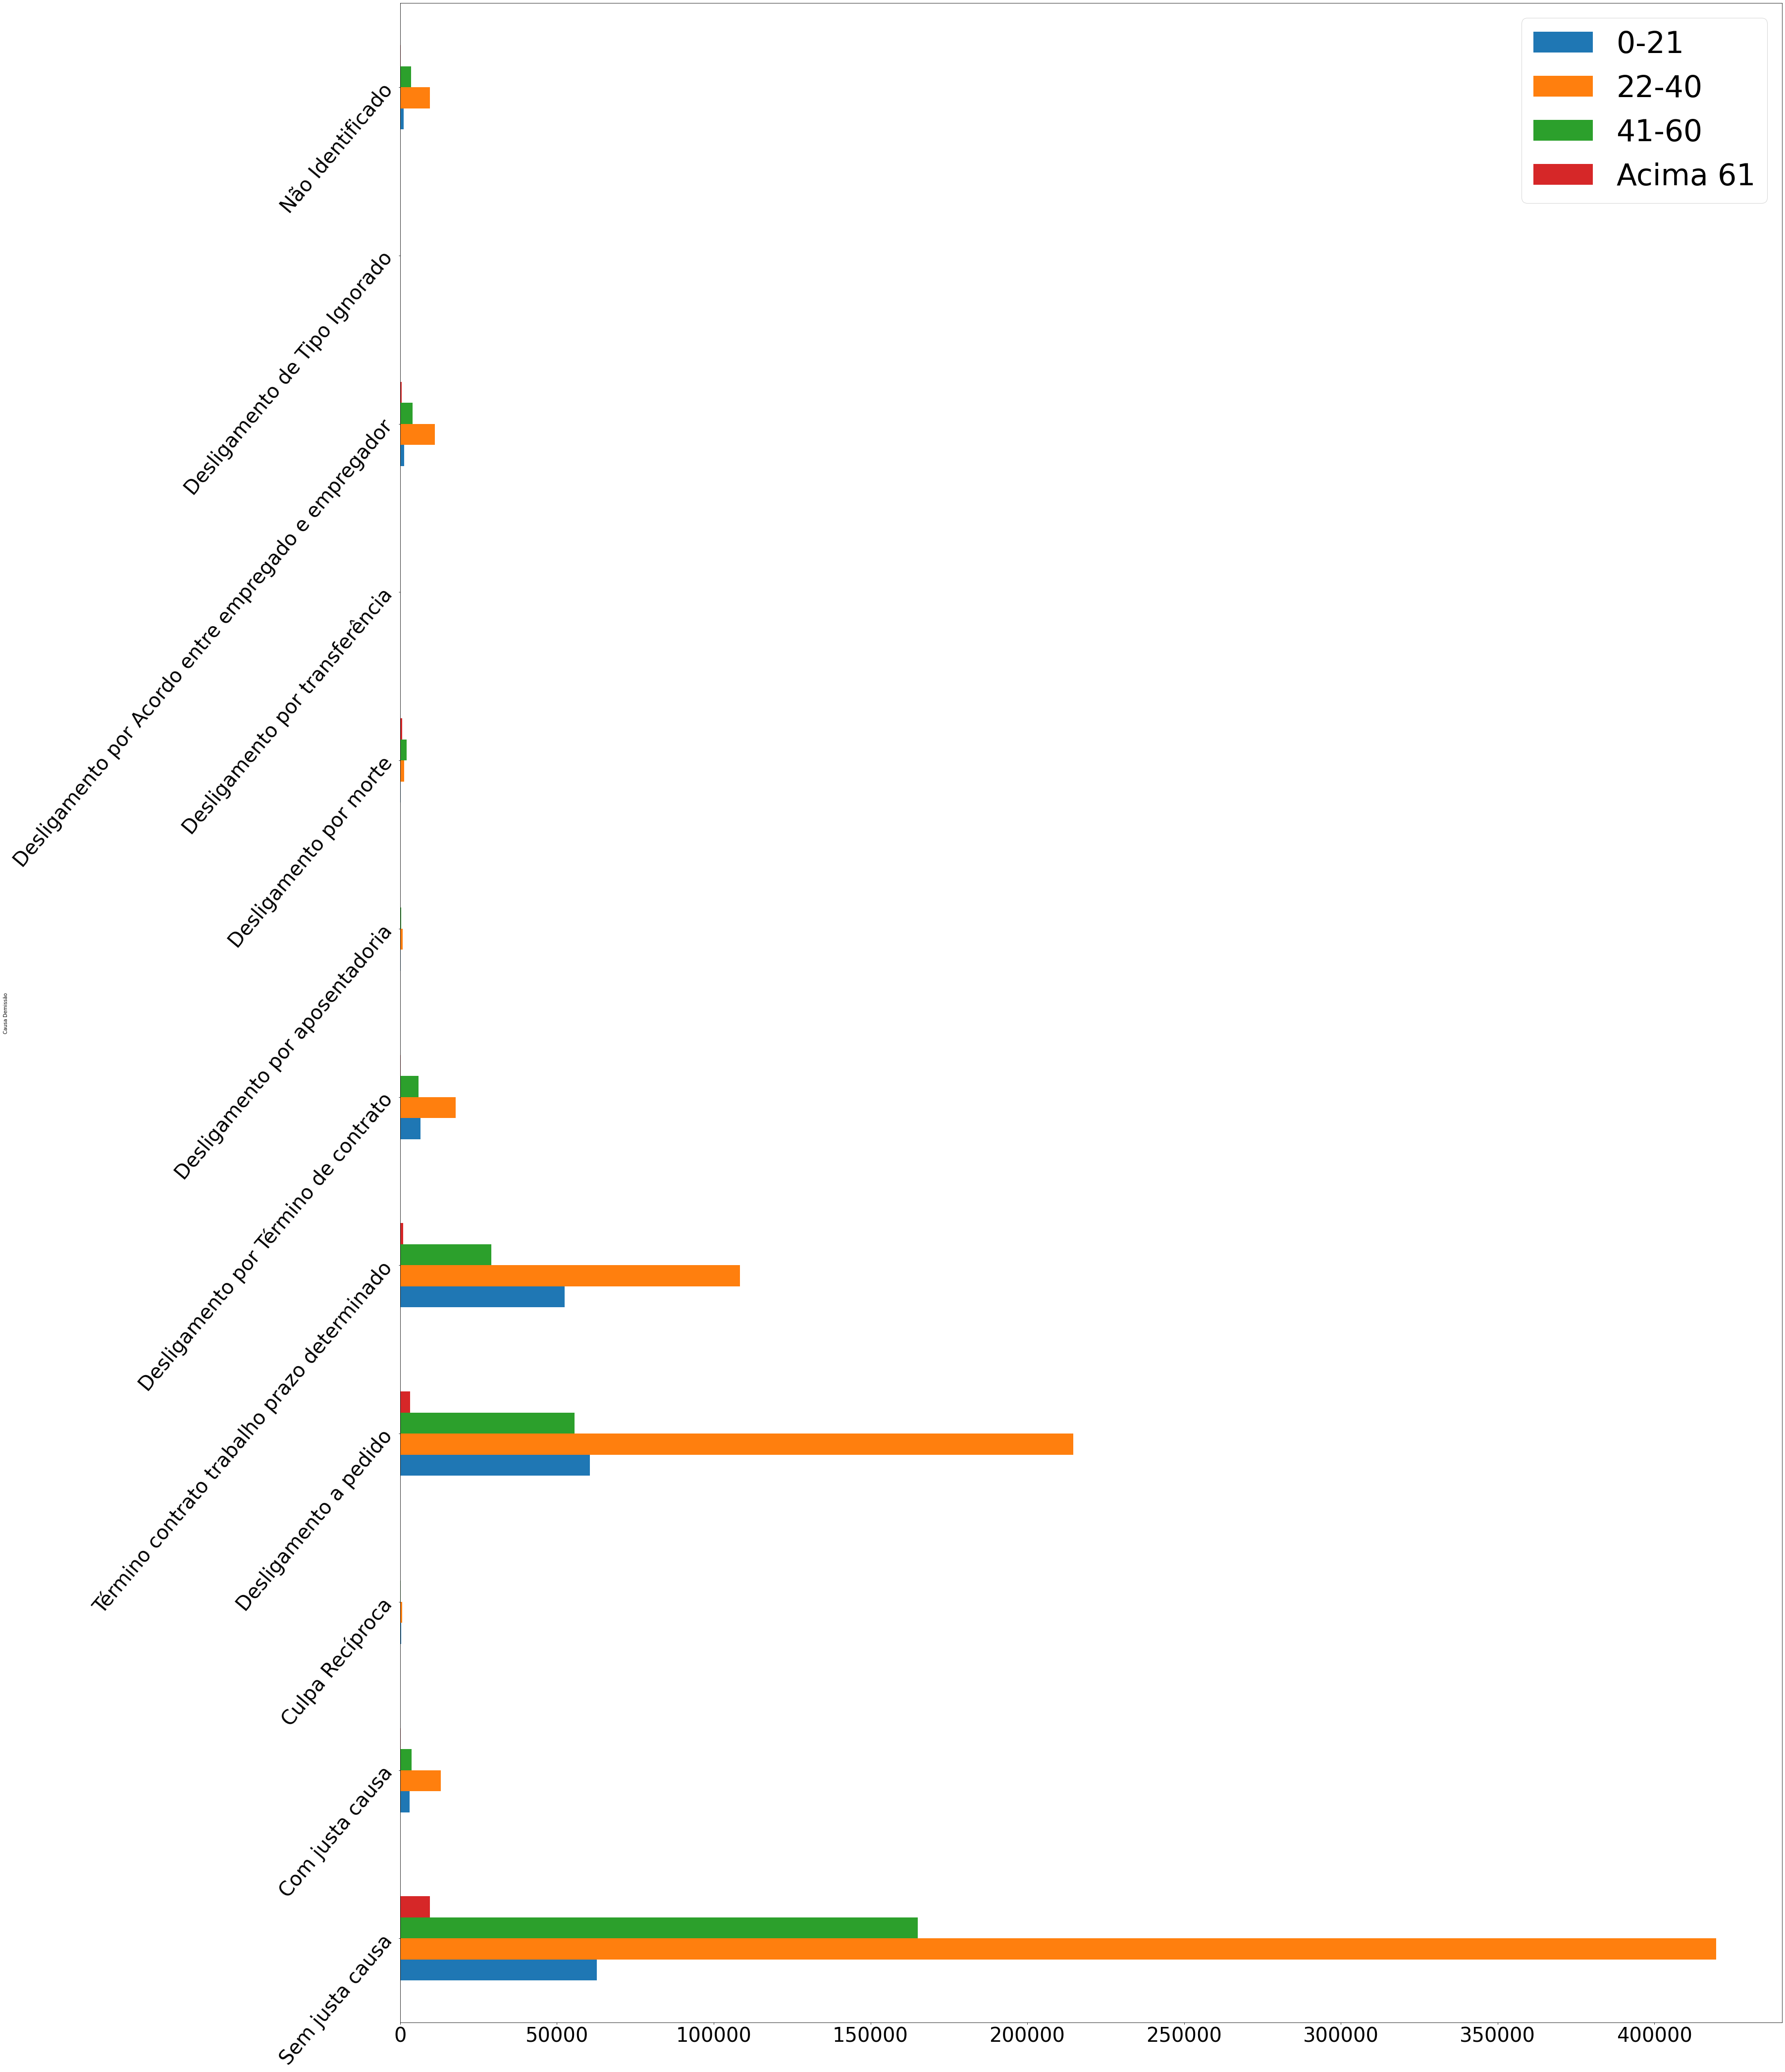

In [478]:
#Causas de demissão formalizadas pelos empregadores
#distribuídas por faixa Etaria
graf = pd.DataFrame({'Causa Demissão': ['Sem justa causa','Com justa causa','Culpa Recíproca','Desligamento a pedido',
                                        'Término contrato trabalho prazo determinado','Desligamento por Término de contrato',
                                        'Desligamento por aposentadoria','Desligamento por morte',
                                        'Desligamento por transferência', 'Desligamento por Acordo entre empregado e empregador',
                                        'Desligamento de Tipo Ignorado','Não Identificado'],
                     '0-21':[DesIdade1Mov31, DesIdade1Mov32, DesIdade1Mov33, DesIdade1Mov40, DesIdade1Mov43, DesIdade1Mov45, DesIdade1Mov50, DesIdade1Mov60, DesIdade1Mov80, DesIdade1Mov90, DesIdade1Mov98, DesIdade1Mov99],
                     '22-40':[DesIdade2Mov31, DesIdade2Mov32, DesIdade2Mov33, DesIdade2Mov40, DesIdade2Mov43, DesIdade2Mov45, DesIdade2Mov50, DesIdade2Mov60, DesIdade2Mov80, DesIdade2Mov90, DesIdade2Mov98, DesIdade2Mov99],
                     '41-60':[DesIdade3Mov31, DesIdade3Mov32, DesIdade3Mov33, DesIdade3Mov40, DesIdade3Mov43, DesIdade3Mov45, DesIdade3Mov50, DesIdade3Mov60, DesIdade3Mov80, DesIdade3Mov90, DesIdade3Mov98, DesIdade3Mov99],
                     'Acima 61':[DesIdade4Mov31, DesIdade4Mov32, DesIdade4Mov33, DesIdade4Mov40, DesIdade4Mov43, DesIdade4Mov45, DesIdade4Mov50, DesIdade4Mov60, DesIdade4Mov80, DesIdade4Mov90, DesIdade4Mov98, DesIdade4Mov99]})
ax = graf.plot.barh(x='Causa Demissão', y=['0-21','22-40','41-60','Acima 61'], rot=50, figsize=(50,75), fontsize=40).legend(loc= 'upper right', prop = {'size':60})